## Data Pre-processing (2021 Problem Statement)

Preliminaries


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
AP_train_path = './data/AP_info.csv'

In [3]:
Wifi_train_path ='./data/training_dataset.csv'
Wifi_test_path ='./data/verification_dataset.csv'

In [4]:
# read dataset [Reading the csv files and storing in form of dataset]
AP_train=pd.read_csv(AP_train_path)

In [5]:
AP_train.head()

,AP SSID,Latitude,Longitude,Hight Difference(m),Indoor/Outdoor
0,1,35.157320,136.926447,0,Outdoor
1,2,35.157347,136.926807,0,Outdoor
2,3,35.157202,136.926827,0,Outdoor
3,4,35.157165,136.926470,0,Outdoor


Transforming the categorical data to numerical ones using one-hot-encoding

In [6]:
AP_train = pd.concat([AP_train,pd.get_dummies(AP_train['Indoor/Outdoor'])['Outdoor']], axis=1, join='inner').drop(columns=['Indoor/Outdoor'])

In [7]:
AP_train

,AP SSID,Latitude,Longitude,Hight Difference(m),Outdoor
0,1,35.157320,136.926447,0,1
1,2,35.157347,136.926807,0,1
2,3,35.157202,136.926827,0,1
3,4,35.157165,136.926470,0,1


In [8]:
train = pd.read_csv(Wifi_train_path)
test = pd.read_csv(Wifi_test_path)

In [9]:
train.head()

,No.,TimeStamp(UNIX),Latitude,Longitude,SSID,Channel,RSSI(dBm)
0,1,1631687696,35.15714,136.926306,1,11,-41
1,2,1631687697,35.15714,136.926306,1,11,-41
2,3,1631687697,35.15714,136.926306,1,11,-41
3,4,1631687697,35.15714,136.926306,1,11,-41
4,5,1631687697,35.15714,136.926306,1,11,-41


In [10]:
train.drop(columns=['No.'], inplace=True)
test.drop(columns=['No.'], inplace=True)
train.head()

,TimeStamp(UNIX),Latitude,Longitude,SSID,Channel,RSSI(dBm)
0,1631687696,35.15714,136.926306,1,11,-41
1,1631687697,35.15714,136.926306,1,11,-41
2,1631687697,35.15714,136.926306,1,11,-41
3,1631687697,35.15714,136.926306,1,11,-41
4,1631687697,35.15714,136.926306,1,11,-41


In [11]:
train

,TimeStamp(UNIX),Latitude,Longitude,SSID,Channel,RSSI(dBm)
0,1631687696,35.157140,136.926306,1,11,-41
1,1631687697,35.157140,136.926306,1,11,-41
2,1631687697,35.157140,136.926306,1,11,-41
3,1631687697,35.157140,136.926306,1,11,-41
4,1631687697,35.157140,136.926306,1,11,-41
...,...,...,...,...,...,...
5195,1631688763,35.157236,136.926489,4,1,-52
5196,1631688763,35.157236,136.926489,4,1,-52
5197,1631688763,35.157236,136.926489,4,1,-52
5198,1631688763,35.157236,136.926489,4,1,-52


In [12]:
import datetime
for x in train['TimeStamp(UNIX)']:
    #print(train['TimeStamp(UNIX)'])
    train['TimeStamp(UNIX)'] = datetime.datetime.fromtimestamp(x)
for x in test['TimeStamp(UNIX)']:
    #print(train['TimeStamp(UNIX)'])
    test['TimeStamp(UNIX)'] = datetime.datetime.fromtimestamp(x)

In [13]:
train.rename(columns = {'TimeStamp(UNIX)':'TimeStamp'}, inplace = True)
test.rename(columns = {'TimeStamp(UNIX)':'TimeStamp'}, inplace = True)

In [14]:
train

,TimeStamp,Latitude,Longitude,SSID,Channel,RSSI(dBm)
0,2021-09-15 06:52:43,35.157140,136.926306,1,11,-41
1,2021-09-15 06:52:43,35.157140,136.926306,1,11,-41
2,2021-09-15 06:52:43,35.157140,136.926306,1,11,-41
3,2021-09-15 06:52:43,35.157140,136.926306,1,11,-41
4,2021-09-15 06:52:43,35.157140,136.926306,1,11,-41
...,...,...,...,...,...,...
5195,2021-09-15 06:52:43,35.157236,136.926489,4,1,-52
5196,2021-09-15 06:52:43,35.157236,136.926489,4,1,-52
5197,2021-09-15 06:52:43,35.157236,136.926489,4,1,-52
5198,2021-09-15 06:52:43,35.157236,136.926489,4,1,-52


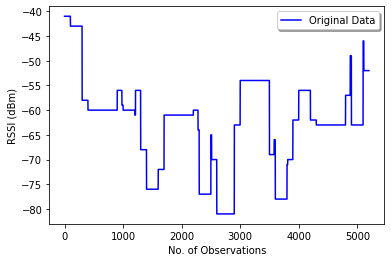

In [15]:
lRSSI=list(train['RSSI(dBm)'])
plt.plot(lRSSI, color="blue", label="Original Data")
plt.xlabel("No. of Observations")
plt.ylabel("RSSI (dBm)")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.show()

Smoothening of the data is required as the RSSI values tend to change abruptly over time.

In [16]:
# calculating simple moving average
# using .rolling(window).mean() ,
# with window size = 80
RSSIMA = (train['RSSI(dBm)']).rolling(80).mean()
 
# removing all the NULL values using
# dropna() method
RSSIMA.dropna(inplace=True)

In [17]:
RSSIMA

79     -41.0
80     -41.0
81     -41.0
82     -41.0
83     -41.0
        ... 
5195   -52.0
5196   -52.0
5197   -52.0
5198   -52.0
5199   -52.0
Name: RSSI(dBm), Length: 5121, dtype: float64

In [18]:
train['RSSIMA'] = RSSIMA

In [19]:
train

,TimeStamp,Latitude,Longitude,SSID,Channel,RSSI(dBm),RSSIMA
0,2021-09-15 06:52:43,35.157140,136.926306,1,11,-41,NaN
1,2021-09-15 06:52:43,35.157140,136.926306,1,11,-41,NaN
2,2021-09-15 06:52:43,35.157140,136.926306,1,11,-41,NaN
3,2021-09-15 06:52:43,35.157140,136.926306,1,11,-41,NaN
4,2021-09-15 06:52:43,35.157140,136.926306,1,11,-41,NaN
...,...,...,...,...,...,...,...
5195,2021-09-15 06:52:43,35.157236,136.926489,4,1,-52,-52.0
5196,2021-09-15 06:52:43,35.157236,136.926489,4,1,-52,-52.0
5197,2021-09-15 06:52:43,35.157236,136.926489,4,1,-52,-52.0
5198,2021-09-15 06:52:43,35.157236,136.926489,4,1,-52,-52.0


In [20]:
trainSM = train.dropna()
trainSM

,TimeStamp,Latitude,Longitude,SSID,Channel,RSSI(dBm),RSSIMA
79,2021-09-15 06:52:43,35.157140,136.926306,1,11,-41,-41.0
80,2021-09-15 06:52:43,35.157140,136.926306,1,11,-41,-41.0
81,2021-09-15 06:52:43,35.157140,136.926306,1,11,-41,-41.0
82,2021-09-15 06:52:43,35.157140,136.926306,1,11,-41,-41.0
83,2021-09-15 06:52:43,35.157140,136.926306,1,11,-41,-41.0
...,...,...,...,...,...,...,...
5195,2021-09-15 06:52:43,35.157236,136.926489,4,1,-52,-52.0
5196,2021-09-15 06:52:43,35.157236,136.926489,4,1,-52,-52.0
5197,2021-09-15 06:52:43,35.157236,136.926489,4,1,-52,-52.0
5198,2021-09-15 06:52:43,35.157236,136.926489,4,1,-52,-52.0


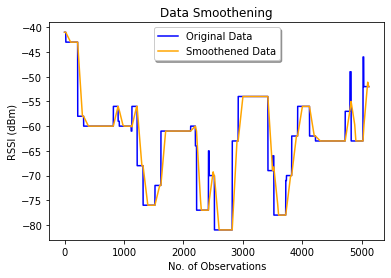

In [21]:
lRSSI=list(trainSM['RSSI(dBm)'])
lMoving_avg=list(trainSM['RSSIMA'])
plt.plot(lRSSI, color="blue", label="Original Data")
plt.plot(lMoving_avg, color="orange", label="Smoothened Data")
plt.title("Data Smoothening")
plt.xlabel("No. of Observations")
plt.ylabel("RSSI (dBm)")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.show()

In [22]:
def moving_average(inp):
  moving_avg= []
  i = 0
  window_size=90
  while i < len(list(inp["RSSI(dBm)"])) - window_size + 1:
      this_window = list(inp["RSSI(dBm)"][i : i + window_size])
      window_average = sum(this_window) / window_size
      moving_avg.append(window_average)
      i += 1
  for z in range(len(list(inp["RSSI(dBm)"]))-len(moving_avg)):
    moving_avg.append(moving_avg[-1])
    
  return moving_avg

RSSI_MA90 = moving_average(trainSM)

In [23]:
len(RSSI_MA90)

5121

In [24]:
trainSM['RSSI_MA90'] = RSSI_MA90

/tmp/ipykernel_993/649016603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainSM['RSSI_MA90'] = RSSI_MA90


In [25]:
trainSM.head()

,TimeStamp,Latitude,Longitude,SSID,Channel,RSSI(dBm),RSSIMA,RSSI_MA90
79,2021-09-15 06:52:43,35.15714,136.926306,1,11,-41,-41.0,-42.533333
80,2021-09-15 06:52:43,35.15714,136.926306,1,11,-41,-41.0,-42.555556
81,2021-09-15 06:52:43,35.15714,136.926306,1,11,-41,-41.0,-42.577778
82,2021-09-15 06:52:43,35.15714,136.926306,1,11,-41,-41.0,-42.600000
83,2021-09-15 06:52:43,35.15714,136.926306,1,11,-41,-41.0,-42.622222


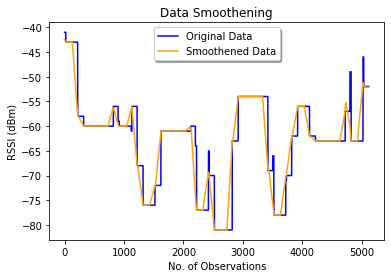

In [26]:
lRSSI=list(trainSM['RSSI(dBm)'])
lMoving_avg=list(trainSM['RSSI_MA90'])
plt.plot(lRSSI, color="blue", label="Original Data")
plt.plot(lMoving_avg, color="orange", label="Smoothened Data")
plt.title("Data Smoothening")
plt.xlabel("No. of Observations")
plt.ylabel("RSSI (dBm)")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.show()